### 이미지와 시계열 처리 모델
  * CNN(합성곱 신경망; Convolutional Neural Network), RNN(순환 신경망; Recurrent Neural Network)
    * 이미지는 일반적으로 CNN으로 처리
    * 시계열 데이터는 RNN으로 처리
  * 이미지를 처리하기 위해 CNN뿐만 아니라 완전 연결 계층(Fully Connected Layer) 방식을 이용할 수 있음
  * RNN은 순차적(시계열) 데이터 학습에 특화된 인공 신경망
    * 내부의 순환 구조로 동작하는 방식임

#### 이미지 처리 모델
  * 여기서는 완전 연결 계층(Fully Connected Layer) 방식으로 진행

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(test_labels)

[7 2 1 ... 4 5 6]


Index 0: Label 7


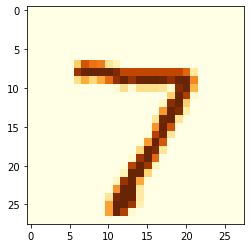

In [3]:
plt.imshow(test_data[0], cmap=plt.cm.YlOrBr)
print(f'Index {0}: Label {test_labels[0]}')

In [4]:
print(train_data[0].shape)

(28, 28)


In [5]:
print(test_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [6]:
width = 28
height = 28
"""
28 * 28 = 784, 총 784개 특성(feature)을 가지고 있음
evidence yi(최종 누적 값) = Σj (Wi,j(가중치) * xj(픽셀의 intensity, 감도))
"""

x_train = train_data.reshape(60000, width*height).astype('float32') / 255.0
x_test = test_data.reshape(10000, width*height).astype('float32') / 255.0

y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential([
    Dense(256, input_dim=width*height, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32)

model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6215 - accuracy: 0.8467
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3278 - accuracy: 0.9078
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.9214
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9304
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2250 - accuracy: 0.9366
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2063 - accuracy: 0.9422
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1905 - accuracy: 0.9466
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1769 - accuracy: 0.9509
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1651 - accuracy: 0.9542
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.154

[0.10692231357097626, 0.9677000045776367]

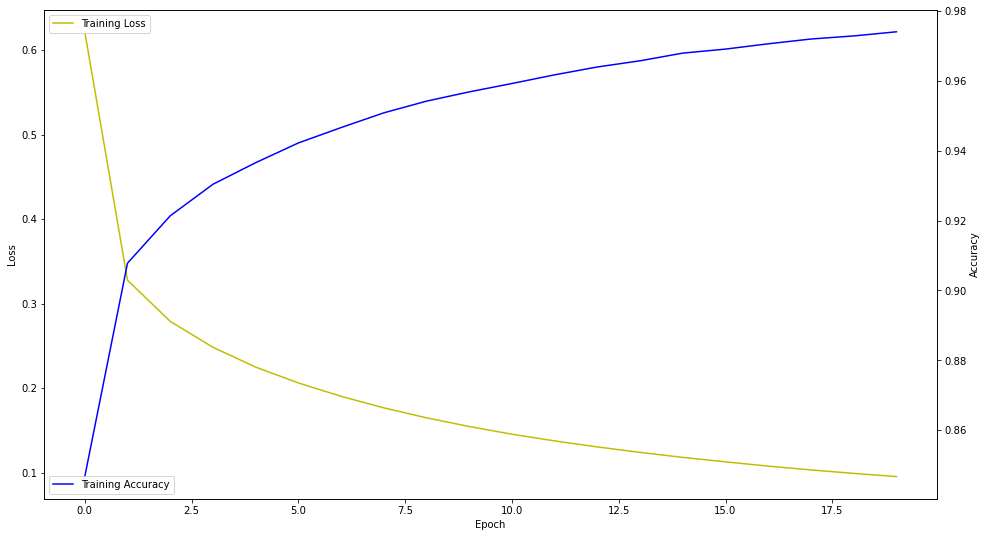

In [10]:
history_dict = history.history

fig, loss_ax = plt.subplots(figsize=(16, 9))

acc_ax = loss_ax.twinx()

loss_ax.plot(history_dict['loss'], 'y', label='Training Loss')
# loss_ax.plot(history_dict['val_loss'], 'r', label='Validation Loss')

acc_ax.plot(history_dict['accuracy'], 'b', label='Training Accuracy')
# acc_ax.plot(history_dict['val_accuracy'], 'g', label='Validation Accuracy')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

##### 필기 숫자 데이터 세트를 다양한 기계학습 모델에 적용하기

In [11]:
# 공통 코드
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [12]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

width = 28
height = 28

train_data = train_data.reshape(60000, width*height).astype('float32') / 255.0
test_data = test_data.reshape(10000, width*height).astype('float32') / 255.0

In [13]:
# 결정트리를 이용하는 경우
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
print(accuracy_score(test_labels, predictions))

0.8762


In [15]:
# KNeighborsClassifier 를 이용하는 경우
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data
labels = digits.target

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9833333333333333


In [16]:
# 직접 작성한 무작위 분류 방식을 이용한 경우
import random
from sklearn.metrics import accuracy_score


class myKNN():
    def fit(self, train_data, train_labels) -> None:
        self.train_data = train_data
        self.train_labels = train_labels
    
    def predict(self, test_data) -> list:
        predictions = []
        for row in test_data:
            label = random.choice(self.train_labels)
            predictions.append(label)
        return predictions


clf = myKNN()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.06666666666666667


In [17]:
# 직접 작성한 유클리디언 분류 방식을 이용한 경우
from scipy.spatial import distance
from sklearn.metrics import accuracy_score


def euc(a, b) -> float:
    return distance.euclidean(a, b)


class eucKNN():
    def fit(self, train_data, train_labels) -> None:
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self, test_data) -> list:
        predictions = []
        for row in test_data:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row) -> int:
        best_dist = euc(row, self.train_data[0])
        best_idx = 0

        for idx, tr_data in enumerate(self.train_data):
            if idx == 0:
                continue
            dist = euc(row, tr_data)
            if dist < best_dist:
                best_dist = dist
                best_idx = idx
        
        return self.train_labels[best_idx]


clf = eucKNN()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9888888888888889


In [18]:
# 필기 숫자 데이터 세트를 이용한 경우
from sklearn.datasets import load_digits
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [19]:
digits = load_digits()
print(len(digits.data), len(digits.target))

1797 1797


In [20]:
def euc(a, b):
    return distance.euclidean(a, b)


class eucKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_idx = 0

        for idx, tr_data in enumerate(self.X_train):
            if idx == 0:
                continue
            dist = euc(row, self.X_train[idx])
            if dist < best_dist:
                best_dist = dist
                best_idx = idx
        
        return self.y_train[best_idx]


clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])
predictions = clf.predict(digits.data[-500:])

print(accuracy_score(digits.target[-500:], predictions))

0.96


In [21]:
# 서포트 벡터 머신(SVM)을 이용한 경우 - hand written data(필기 숫자 데이터)
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9888888888888889
